## Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Load

In [58]:
# from sklearn.datasets import load_breast_cancer
# cancer_dataset = load_breast_cancer()
df = pd.read_csv("data\cancer.csv")

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\21it4\AppData\Local\Temp\ipykernel_13176\3636052991.py:3: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("data\cancer.csv")


In [59]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812


In [60]:
type(df)

pandas.core.frame.DataFrame

In [61]:
df.shape

(569, 11)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   569 non-null    int64  
 1   diagnosis            569 non-null    object 
 2   radius_mean          569 non-null    float64
 3   texture_mean         569 non-null    float64
 4   perimeter_mean       569 non-null    float64
 5   area_mean            569 non-null    float64
 6   smoothness_mean      569 non-null    float64
 7   compactness_mean     569 non-null    float64
 8   concavity_mean       569 non-null    float64
 9   concave points_mean  569 non-null    float64
 10  symmetry_mean        569 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 49.0+ KB


In [63]:
len(df)

569

In [64]:
df.isnull().sum()

id                     0
diagnosis              0
radius_mean            0
texture_mean           0
perimeter_mean         0
area_mean              0
smoothness_mean        0
compactness_mean       0
concavity_mean         0
concave points_mean    0
symmetry_mean          0
dtype: int64

In [65]:
df.duplicated().sum()

0

C:\Users\21it4\AppData\Local\Temp\ipykernel_13176\3919548618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["diagnosis"].value_counts().index, y=df["diagnosis"].value_counts(), palette=cols)


diagnosis
B    357
M    212
Name: count, dtype: int64


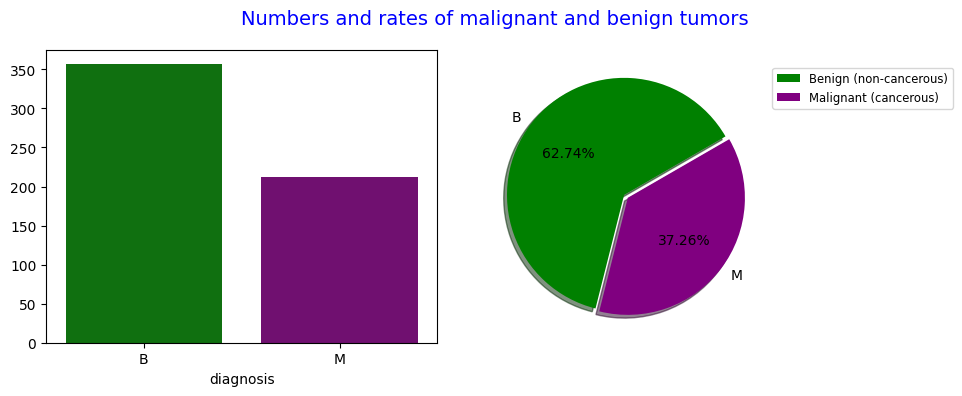

In [66]:
cols = ["green", "purple"]
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=df["diagnosis"].value_counts().index, y=df["diagnosis"].value_counts(), palette=cols)
plt.ylabel("")
plt.subplot(1,2,2)
plt.pie(x=df["diagnosis"].value_counts(), labels=df["diagnosis"].value_counts().index, shadow=True,
        explode=[0.02, 0.02], startangle=30, autopct='%0.2f%%', colors=cols)
plt.legend(labels=["Benign (non-cancerous)", "Malignant (cancerous)"], loc=(1,0.8), fontsize="small")
plt.suptitle("Numbers and rates of malignant and benign tumors", fontsize=14, color="b")
plt.tight_layout()
print(df.diagnosis.value_counts())
plt.show()

In [67]:
# 1 for Malignant, 0 for Benign

df["diagnosis"] = df["diagnosis"].map({"B": 0, "M":1})

In [68]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812


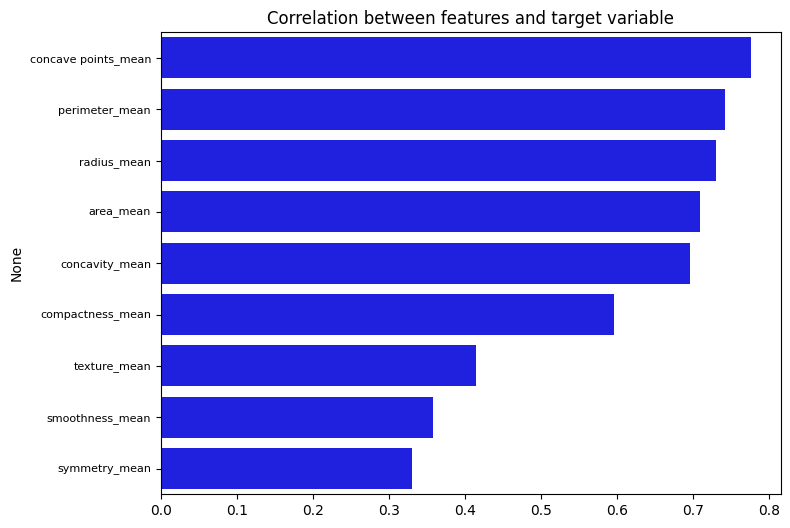

In [69]:
corr = df.drop("id", axis=1).corr()["diagnosis"].abs().sort_values(ascending=False).drop("diagnosis")

plt.figure(figsize=(8,6))
sns.barplot(x=corr, y=corr.index, color="blue")
plt.title("Correlation between features and target variable")
plt.yticks(fontsize= 8)
plt.xlabel("")
plt.show()

In [70]:
y = df["diagnosis"]
X = df.drop(["id", "diagnosis"], axis=1)

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((426, 9), (143, 9), (426,), (143,))

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Support Vector Classifier

In [75]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model} accuracy: {accuracy:.3f}\n")

SVC() accuracy: 0.979



In [76]:
data = np.array([[13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885]])
print(model.predict(data))

[0]


## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_sc, y_train)
y_pred_lr = model.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"{model} accuracy: {accuracy:.3f}\n")

LogisticRegression() accuracy: 0.965



In [78]:
import pickle
filename = 'cancer-prediction-model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [79]:
import numpy as np
data = np.array([[11.94,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868]])
print(model.predict(data))


[1]


## K Nearest Neighbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model} accuracy: {accuracy:.3f}\n")

KNeighborsClassifier() accuracy: 0.951



In [81]:
data = np.array([[0,2,0,4,6,0,1,3,2]])
print(model.predict(data))

[1]


## Decision tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model} accuracy: {accuracy:.3f}\n")

DecisionTreeClassifier(criterion='entropy', random_state=51) accuracy: 0.951



## Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print(f"{model} accuracy: {accuracy:.3f}\n")

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=51) accuracy: 0.958



## Confusion Matrix

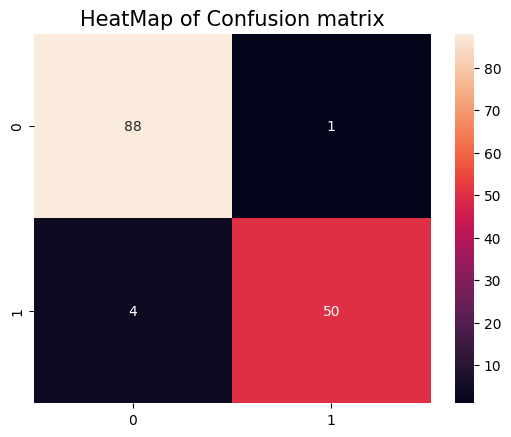

In [84]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.title('HeatMap of Confusion matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()